In [2]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.applications.vgg16 import VGG16

In [4]:
path_root = 'malimg_data' 

In [5]:
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [6]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [7]:
ds, labels = next(batches)

In [8]:
ds.shape

(9339, 64, 64, 3)

In [9]:
labels.shape

(9339, 25)

In [10]:
classes = batches.class_indices.keys()

In [11]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

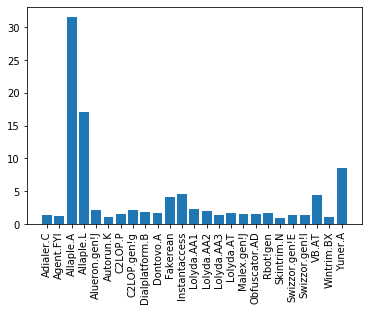

In [12]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ds/255.,labels, test_size=0.3)

In [14]:
X_train.shape

(6537, 64, 64, 3)

In [15]:
X_test.shape

(2802, 64, 64, 3)

In [26]:
conv_base = VGG16(
    weights = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
    include_top = False,
    input_shape = (64,64,3)
)

In [27]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name =='block5_conv1':
        set_trainable  = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
for layer in conv_base.layers:
    print(layer.name,layer.trainable)

input_7 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [28]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [29]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(25,activation = 'softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
Total params: 14,986,841
Trainable params: 7,351,577
Non-trainable params: 7,635,264
_________________________________________________________________


In [33]:
model.compile(optimizer = keras.optimizers.RMSprop(lr=1e-5),loss = 'categorical_crossentropy',metrics = ['accuracy'])


/home/ssfv/anaconda3/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [34]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 50)


Epoch 1/50
205/205 [==============================] - 30s 144ms/step - loss: 1.4978 - accuracy: 0.6049 - val_loss: 0.8612 - val_accuracy: 0.7313
Epoch 2/50
205/205 [==============================] - 29s 144ms/step - loss: 0.6468 - accuracy: 0.8114 - val_loss: 0.5569 - val_accuracy: 0.7984
Epoch 3/50
205/205 [==============================] - 29s 141ms/step - loss: 0.4553 - accuracy: 0.8661 - val_loss: 0.3928 - val_accuracy: 0.8840
Epoch 4/50
205/205 [==============================] - 29s 143ms/step - loss: 0.3611 - accuracy: 0.8870 - val_loss: 0.3853 - val_accuracy: 0.8815
Epoch 5/50
205/205 [==============================] - 29s 141ms/step - loss: 0.3108 - accuracy: 0.9000 - val_loss: 0.3220 - val_accuracy: 0.8944
Epoch 6/50
205/205 [==============================] - 29s 142ms/step - loss: 0.2760 - accuracy: 0.9085 - val_loss: 0.2864 - val_accuracy: 0.9104
Epoch 7/50
205/205 [==============================] - 29s 141ms/step - loss: 0.2504 - accuracy: 0.9182 - val_loss: 0.3614 - val_ac

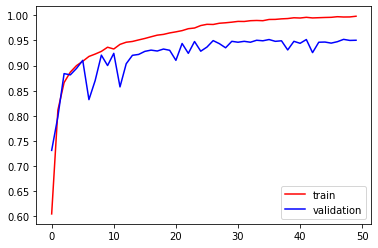

In [35]:
plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'validation')
plt.legend()
plt.show()

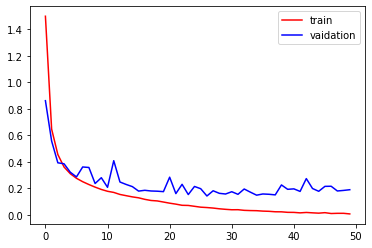

In [36]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'vaidation')
plt.legend()
plt.show()